
- Email: kanwar_dusaj@live.in
- Reference: Advances in Financial Machine Learning, Marcos Lopez De Prado, pg 40


In [11]:
#importing libraries requried
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [12]:
# import Data & Convert Index to DateTime
path = 'saved_data/'

# you will need to first create these files by running the main.py file.
tick_bars = pd.read_csv(path + 'tick_bars.csv', index_col='date')
volume_bars = pd.read_csv(path + 'volume_bars.csv', index_col='date')
dollar_bars = pd.read_csv(path + 'dollar_bars.csv', index_col='date')

tick_bars.index = pd.to_datetime(tick_bars.index)
volume_bars.index = pd.to_datetime(volume_bars.index)
dollar_bars.index = pd.to_datetime(dollar_bars.index)

# Show example
dollar_bars.head()

,open,high,low,close,volume,vwap
date,,,,,,
2013-09-01 18:18:58.662,1640.25,1642.00,1639.00,1641.25,21722.0,1640.667273
2013-09-01 21:42:07.388,1641.25,1643.50,1639.75,1640.75,21706.0,1641.830116
2013-09-02 02:05:25.233,1640.75,1644.50,1640.50,1644.50,21652.0,1643.149905
2013-09-02 03:01:56.174,1644.50,1646.00,1642.75,1645.00,21709.0,1644.556854
2013-09-02 04:32:44.340,1645.00,1647.25,1644.25,1645.50,21646.0,1646.012254


## What bar type produces the most stable weekly count? 

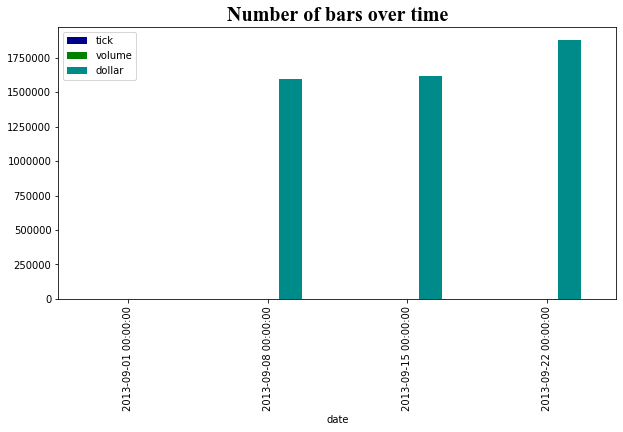

In [13]:
tick_count = tick_bars['close'].resample('W', label='right').count()
volume_count = volume_bars['close'].resample('W', label='right').count()
dollar_count = dollar_bars['close'].resample('W', label='right').count()

count_df = pd.concat([tick_count, volume_count, dollar_count], axis=1)
count_df.columns = ['tick', 'volume', 'dollar']

# Plot
count_df.plot(kind='bar', figsize=[10, 5], color=('darkblue', 'green', 'darkcyan'))
plt.title('Number of bars over time', loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

## Compute serieal correlation of returns for the three bar types. What bar method has the lowest serial correlation?

In [14]:
tick_returns = np.log(tick_bars['close']).diff().dropna()
volume_returns = np.log(volume_bars['close']).diff().dropna()
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

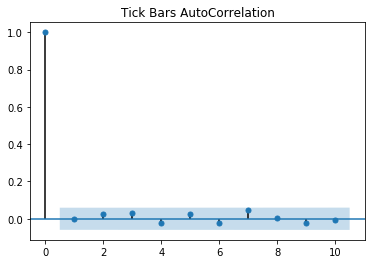

In [7]:
plot_acf(tick_returns, lags=10)
plt.title('Tick Bars AutoCorrelation')
plt.show()

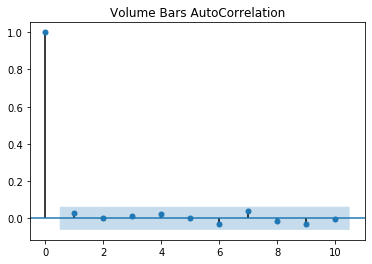

In [8]:
plot_acf(volume_returns, lags=10)
plt.title('Volume Bars AutoCorrelation')
plt.show()

In [ ]:
plot_acf(dollar_returns, lags=10)
plt.title('Dollar Bars AutoCorrelation')
plt.show()

## Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

In [15]:
from scipy import stats


In [17]:
test_tick_returns = int(stats.jarque_bera(tick_returns)[0])
test_volume_returns = int(stats.jarque_bera(volume_returns)[0])
test_dollar_returns = int(stats.jarque_bera(dollar_returns)[0])

In [19]:
test_tick_returns

4521

In [20]:
test_volume_returns

4911

In [21]:
test_dollar_returns

19175446465

## Standardize & Plot the Distributions

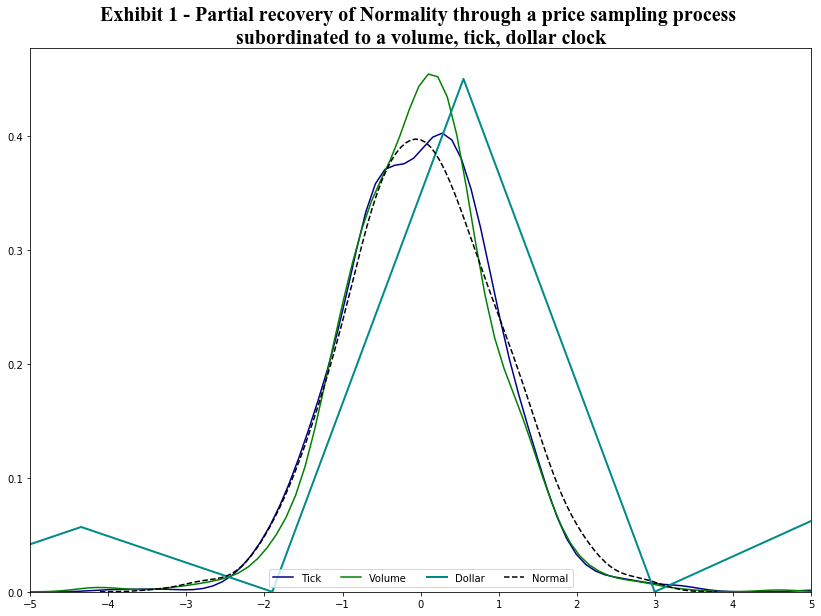

In [22]:
# Calculate the differences
tick_diff = tick_returns
volume_diff = volume_returns
dollar_diff = dollar_returns

# Standardize the data
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

# Plot the Distributions
plt.figure(figsize=(14,10))
sns.kdeplot(tick_standard, label="Tick", bw=0.25, color='darkblue')
sns.kdeplot(volume_standard, label="Volume", bw=0.25, color='green')
sns.kdeplot(dollar_standard, label="Dollar", bw=0.25, linewidth=2, color='darkcyan')

sns.kdeplot(np.random.normal(size=len(volume_returns)), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Exhibit 1 - Partial recovery of Normality through a price sampling process \nsubordinated to a volume, tick, dollar clock',
          loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.xlim(-5, 5)
plt.show()